In [ ]:
#C2054492

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv("Coursework_1_data.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['VisitorType'] = labelencoder.fit_transform(df['VisitorType'])
df['Month'] = labelencoder.fit_transform(df['Month'])
df['Weekend'] = labelencoder.fit_transform(df["Weekend"])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from imblearn.pipeline import Pipeline, make_pipeline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
categorical_features = ["Month", "OperatingSystems", 
                        "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
print(len(categorical_features))
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

7


In [ ]:
numerical_features = ["Administrative_Duration","Informational_Duration", "Administrative", "Informational", "ProductRelated",
                      "ProductRelated_Duration", "PageValues", "SpecialDay", "ExitRates", "BounceRates"]
print(len(numerical_features))
numerical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler()),
    ("pt", PowerTransformer(method = 'yeo-johnson'))
    #("QuantileTransformer", QuantileTransformer())
])

10


In [ ]:
preprocessing = ColumnTransformer([
    ("categorical", categorical_transformer, categorical_features),
    ("numerical", numerical_transformer, numerical_features)
])

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [ ]:
X = df.drop("Revenue",1)
y = df.Revenue
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train  = y_train.values
y_test  = y_test.values

In [ ]:

parametreler = {'xgbclassifier__objective': ["reg:logistic"],
                'xgbclassifier__n_estimators': [20],
                "xgbclassifier__learning_rate" : [0.05, 0.1],
                "xgbclassifier__max_depth" : [5]
                #"xgbclassifier__max_scale_pos_weight" : [2]
                }

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 

In [ ]:
from sklearn.metrics import classification_report

imbalance_pipeline = make_pipeline(preprocessing,
                              SMOTE(sampling_strategy= 0.80),
                              #RandomUnderSampler(),
                              xgb.XGBClassifier())

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 

grid_imbalance = GridSearchCV(imbalance_pipeline, param_grid=parametreler, cv=cv, scoring='recall',
                        return_train_score=True)

grid_imbalance.fit(X_train, y_train)

y_pred = grid_imbalance.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
print("*****XGBoosting-SMOTE-SKFold****")
print("Validation Recall: {}".format(grid_imbalance.best_score_))

print("Recall Test: {}".format(recall_score(y_test, y_pred)))

print("Precision Test: {}".format(precision_score(y_test, y_pred)))

print("F2 Test: {}".format(fbeta_score(y_test, y_pred,2)))

print("F1 Test: {}".format(fbeta_score(y_test, y_pred,1)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

*****XGBoosting-SMOTE-SKFold****
Validation Recall: 0.7527972027972029
Recall Test: 0.8235294117647058
Precision Test: 0.6182965299684543
F2 Test: 0.7722616233254531
F1 Test: 0.7063063063063063
[[2365  242]
 [  84  392]]
              precision    recall  f1-score   support

       False       0.97      0.91      0.94      2607
        True       0.62      0.82      0.71       476

    accuracy                           0.89      3083
   macro avg       0.79      0.87      0.82      3083
weighted avg       0.91      0.89      0.90      3083



In [ ]:
grid_imbalance.best_params_

{'xgbclassifier__learning_rate': 0.05,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__n_estimators': 20,
 'xgbclassifier__objective': 'reg:logistic'}

In [ ]:
fbeta_score(y_test, y_pred, beta = 2)

0.7722616233254531

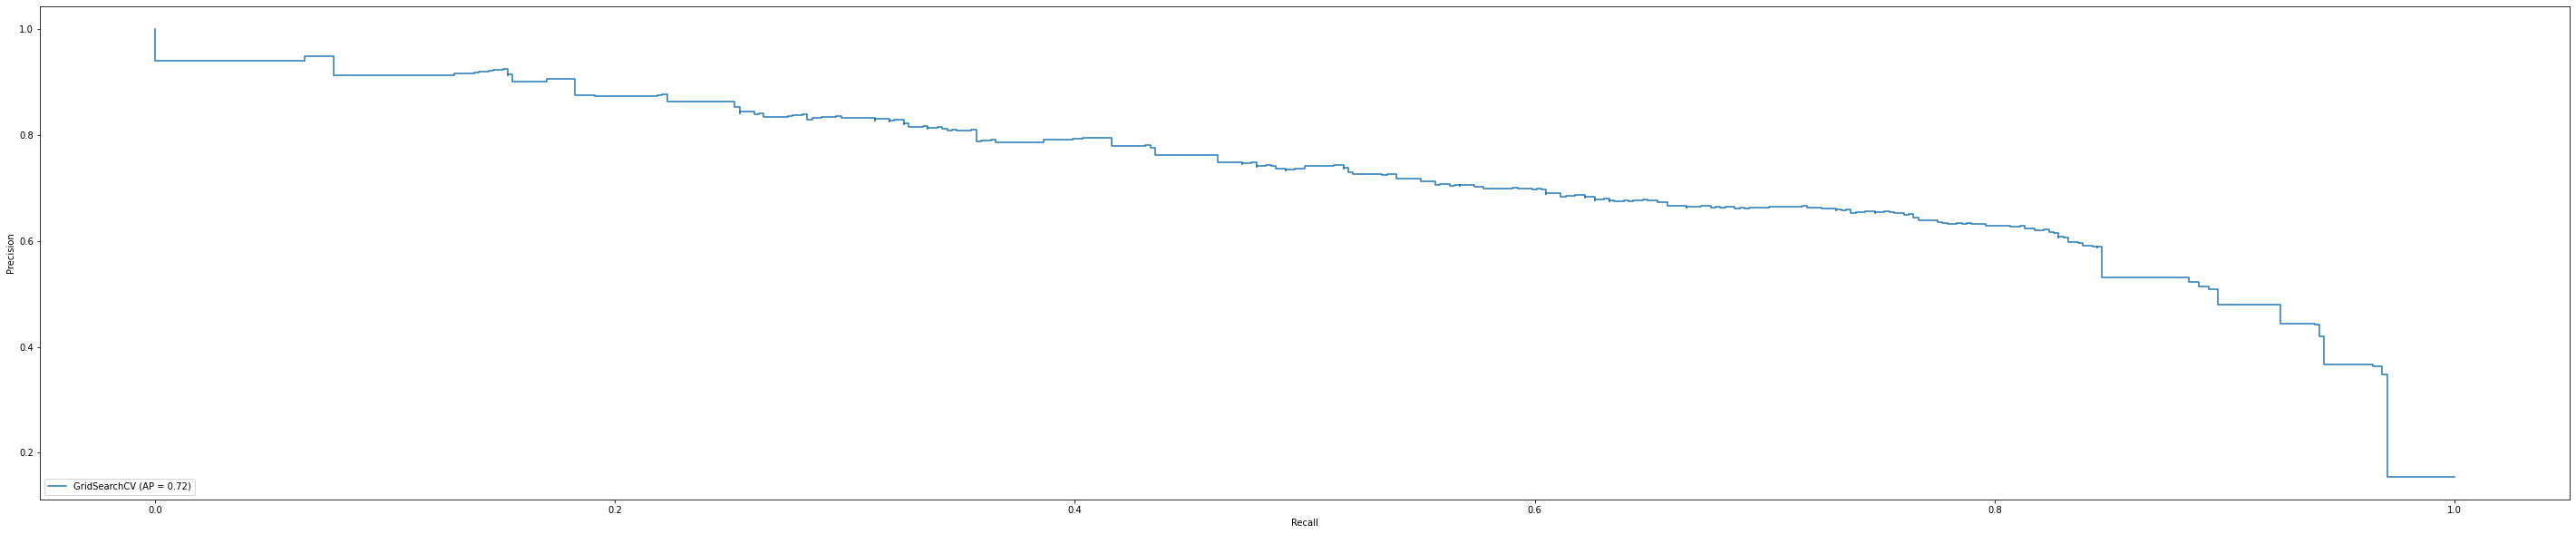

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(grid_imbalance ,X_test, y_test)

No Skill ROC AUC 0.503
XGBoost ROC AUC 0.931


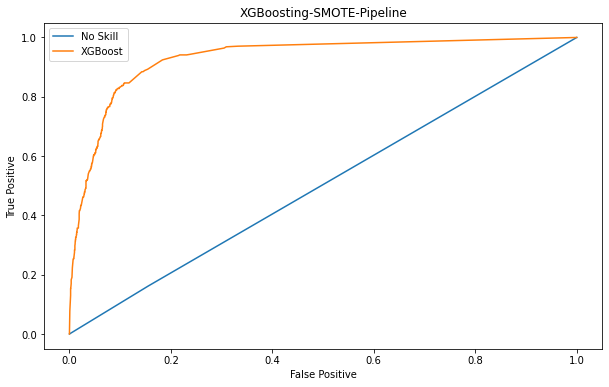

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(test_y, dummy_probs, model_probs):
    plt.figure(figsize=(10,6))
    
    falsep, truep, _ = roc_curve(test_y, dummy_probs)
    plt.plot(falsep, truep, label='No Skill')
    
    falsep, truep, _ = roc_curve(test_y, model_probs)
    plt.plot(falsep, truep, label='XGBoost')
    
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title("XGBoosting-SMOTE-Pipeline")
    plt.legend()
    plt.show()

model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)
dummy_probs = y_pred_prob[:, 1]

roc_auc = roc_auc_score(y_test, dummy_probs)
print('No Skill ROC AUC %.3f' % roc_auc)

y_pred_prob = grid_imbalance.predict_proba(X_test)
modelprod = y_pred_prob[:, 1]

roc_auc = roc_auc_score(y_test, modelprod)
print('XGBoost ROC AUC %.3f' % roc_auc)

plot_roc_curve(y_test, dummy_probs, modelprod)